# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# NOTE added an import
import numpy as np
# %matplotlib inline
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame keeping all results
mouse_results = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_results.head()

# --------------this does not present in same order as start code results------------------

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(mouse_results["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Create the dataframe that contains just duplicates ref https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicates = mouse_results[mouse_results.duplicated(["Mouse ID", "Timepoint"], keep=False)]
# Print the list of unique mice from the duplicates df
duplist = duplicates["Mouse ID"].unique()
duplist

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info = mouse_results[mouse_results["Mouse ID"].isin(duplist)]
duplicate_mouse_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
results_no_dup = mouse_results[mouse_results["Mouse ID"].isin(duplist)==False]
results_no_dup.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
len(results_no_dup["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = results_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = results_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumor = results_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_dev_tumor = results_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
std_err_tumor = results_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
result_stats = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor, 
                              "Tumor Volume Variance": var_tumor, "Tumor Volume Std. Dev": std_dev_tumor, 
                              "Tumor Volume Std. Err": std_err_tumor})
result_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# DataFrame.aggregate(func=None, axis=0, *args, **kwargs)
mice_stat_sum = results_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
mice_stat_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Calculate the statistics of final tumor volumes only

# Reduce to the last tumor size by doing a groupby to get max time point list and merge back with original DF not keeping unaligned data
max_tp = results_no_dup.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
all_max_tp = pd.merge(max_tp, results_no_dup, on=["Mouse ID", "Timepoint"], how="inner")
all_max_tp_stat_vol = all_max_tp.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "count", "sem", "min", "max"])
all_max_tp_stat_vol


,mean,median,var,std,count,sem,min,max
Drug Regimen,,,,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,25,1.143038,23.343598,47.685963
Ceftamin,57.753977,59.851956,69.982735,8.365568,25,1.673114,45.000000,68.923185
Infubinol,58.178246,60.165180,74.010875,8.602957,25,1.720591,36.321346,72.226731
Ketapril,62.806191,64.487812,98.921330,9.945920,25,1.989184,45.000000,78.567014
Naftisol,61.205757,63.283288,106.029927,10.297083,25,2.059417,45.000000,76.668817
Placebo,60.508414,62.030594,78.759797,8.874672,25,1.774934,45.000000,73.212939
Propriva,56.493884,55.591622,70.822755,8.415626,24,1.717832,45.000000,72.455421
Ramicane,36.191390,36.561652,32.166354,5.671539,25,1.134308,22.050126,45.220869
Stelasyn,61.001707,62.192350,90.331586,9.504293,24,1.940056,45.000000,75.123690


In [13]:
# Confirm all mice started at the same tumor volume by calculating the statistics of starting tumor volumes only

min_tp = results_no_dup.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].min()
all_min_tp = pd.merge(min_tp, results_no_dup, on=["Mouse ID", "Timepoint"], how="inner")
all_min_tp_stat_vol = all_min_tp.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
all_min_tp_stat_vol

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [25]:
# Is gender distributed differently across regimens?
regimen_gender = all_max_tp.groupby(["Sex", "Drug Regimen"])["Mouse ID"].count()
regimen_gender

Sex     Drug Regimen
Female  Capomulin       13
        Ceftamin        13
        Infubinol       12
        Ketapril         9
        Naftisol        13
        Placebo         13
        Propriva        11
        Ramicane         9
        Stelasyn        15
        Zoniferol       15
Male    Capomulin       12
        Ceftamin        12
        Infubinol       13
        Ketapril        16
        Naftisol        12
        Placebo         12
        Propriva        13
        Ramicane        16
        Stelasyn         9
        Zoniferol       10
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

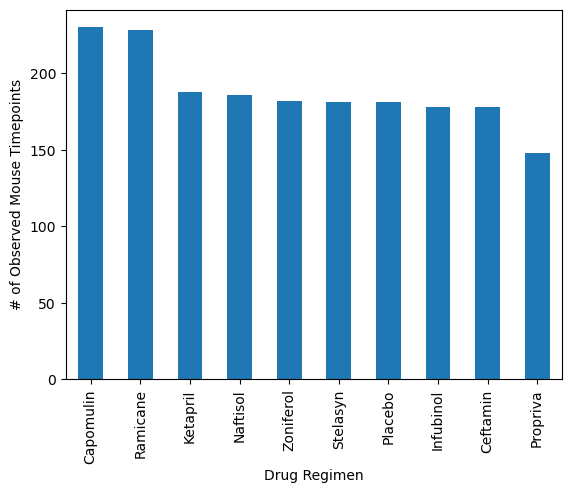

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# With duplicate Mouse ID/Timepoints removed, can use value_counts() across Drug Regimen to get the total rows in a series
drug_sum = results_no_dup["Drug Regimen"].value_counts()

# Set the pandas bar plot with x, y labels; starter code output seems to indicate default color and width so those are left assumed.
drug_sum.plot(kind="bar", ylabel="# of Observed Mouse Timepoints", xlabel="Drug Regimen")
# I would prefer wider bars so I would modify to if reporting on my own:
# drug_sum.plot(kind="bar", ylabel="# of Observed Mouse Timepoints", xlabel="Drug Regimen", width=0.75)

# per TA can still use plt.show for printing the chart even though it is calling matplotlib
plt.show()

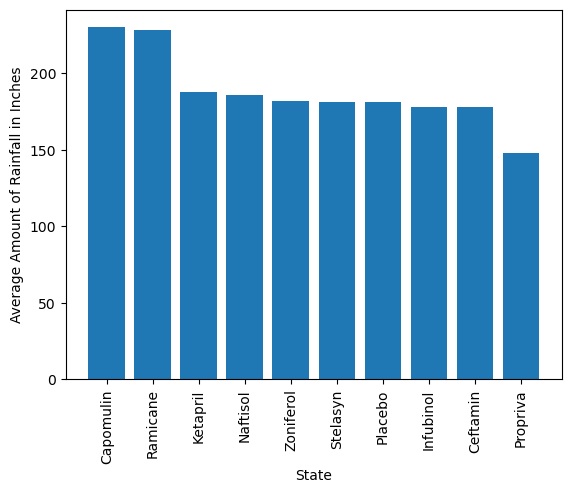

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# With duplicate Mouse ID/Timepoints removed, can use value_counts() across Drug Regimen to get the total rows in a series
drug_summary = results_no_dup["Drug Regimen"].value_counts()

# Set x axis and tick locations
x_axis = np.arange(len(drug_summary))
tick_locs = [x for x in x_axis]

# Configure bar chart with values and tick labels
plt.bar(x_axis, drug_summary)
plt.xticks(tick_locs, drug_summary.index, rotation="vertical")

# Add axis labels
plt.xlabel("State")
plt.ylabel("Average Amount of Rainfall in Inches")

plt.show()


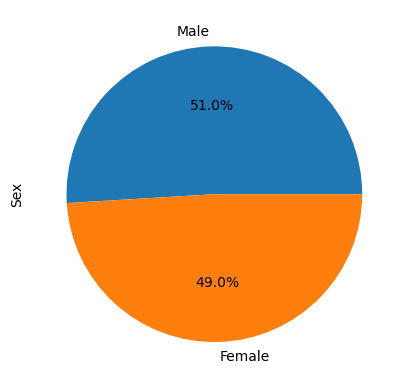

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Use a groupby function to group IDs by Sex and count them; then, sort descending
sex_num = results_no_dup.groupby(["Sex"])["Mouse ID"].count().sort_values(ascending=False)

# Create plot with formatted % and ylabel
sex_num.plot(kind="pie", ylabel="Sex", autopct="%1.1f%%")

# per TA can still use plt.show for printing the chart even though it is calling matplotlib
plt.show()

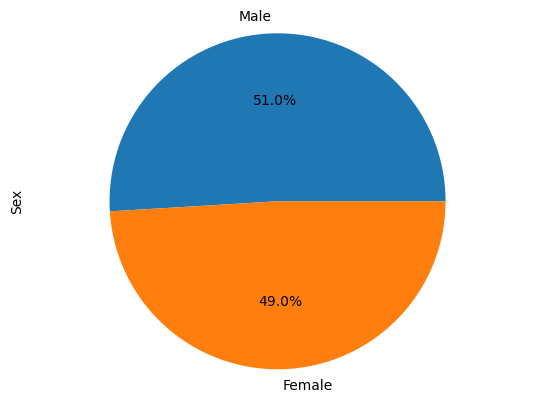

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Use a groupby function to group IDs by Sex and count them; then sort descending
gender_num = results_no_dup.groupby(["Sex"])["Mouse ID"].count().sort_values(ascending=False)

# Create plot with formatted % and ylabel
plt.pie(gender_num, labels=gender_num.index, autopct="%1.1f%%")

# Format with label and ensure it is round
plt.ylabel("Sex")
plt.axis("equal")

# Note: could use title instead of ylabel: plt.title("Sex", rotation='vertical', x=0, y = 0.5)

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Reduce DF to desired drug regimens using loc
cap_ram_inf_cef = results_no_dup.loc[(results_no_dup["Drug Regimen"]=="Capomulin") | (results_no_dup["Drug Regimen"]=="Ramicane") | 
                                     (results_no_dup["Drug Regimen"]=="Infubinol") | (results_no_dup["Drug Regimen"]=="Ceftamin"), :]
# cap_ram_inf_cef.to_csv('temp.csv')

# Further reduce to the last tumor size by doing a groupby to get max time point list and merge back with original DF not keeping unaligned data
grp_max_tp = cap_ram_inf_cef.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
# grp_max_tp.to_csv('temp2.csv')
cap_ram_inf_cef_max = pd.merge(grp_max_tp, results_no_dup, on=["Mouse ID", "Timepoint"], how="inner")
# cap_ram_inf_cef_max.to_csv('temp3.csv')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# this is not required for how I did plotting...

# Calculate the quartiles for all drug regimens
quartiles = cap_ram_inf_cef_max.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    vol_outliers=[]
    iqr = quartiles[drug][0.75]-quartiles[drug][0.25]
    lowerb = quartiles[drug][0.25] - 1.5*iqr
    upperb = quartiles[drug][0.75] + 1.5*iqr
    df = cap_ram_inf_cef_max.loc[(cap_ram_inf_cef_max["Drug Regimen"]==drug) & 
                                 ((cap_ram_inf_cef_max["Tumor Volume (mm3)"]>upperb) | (cap_ram_inf_cef_max["Tumor Volume (mm3)"]<lowerb))]
    for i in range(len(df)):
        vol_outliers.append(round(df["Tumor Volume (mm3)"].iloc[i],3))
    # print(f"{drug}'s potential outliers: {vol_outliers}, {quartiles[drug]}")
    print(f"{drug}'s Final Tumor Volume (mm3) IQR: {round(iqr,3)}, potential outliers: {vol_outliers}")

Capomulin's Final Tumor Volume (mm3) IQR: 7.782, potential outliers: []
Ramicane's Final Tumor Volume (mm3) IQR: 9.099, potential outliers: []
Infubinol's Final Tumor Volume (mm3) IQR: 11.477, potential outliers: [36.321]
Ceftamin's Final Tumor Volume (mm3) IQR: 15.578, potential outliers: []


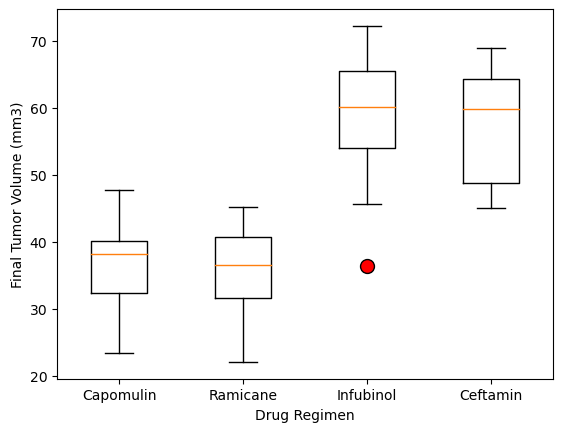

In [15]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([cap_ram_inf_cef_max.loc[(cap_ram_inf_cef_max["Drug Regimen"]=="Capomulin"), "Tumor Volume (mm3)"],
             cap_ram_inf_cef_max.loc[(cap_ram_inf_cef_max["Drug Regimen"]=="Ramicane"), "Tumor Volume (mm3)"],
             cap_ram_inf_cef_max.loc[(cap_ram_inf_cef_max["Drug Regimen"]=="Infubinol"), "Tumor Volume (mm3)"],
             cap_ram_inf_cef_max.loc[(cap_ram_inf_cef_max["Drug Regimen"]=="Ceftamin"), "Tumor Volume (mm3)"]],
            flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
ax1.set_xticklabels(treatments)
plt.show()
#treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

## Line and Scatter Plots

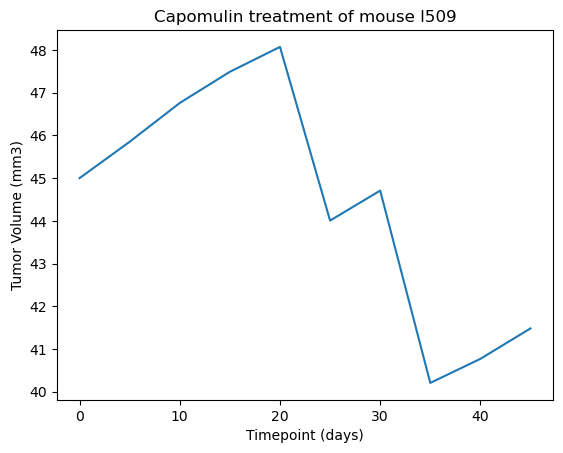

In [16]:
# For mouse l509 treated by Capomulin, create a line plot of tumor volume vs. time point
l509 = results_no_dup.loc[(results_no_dup["Mouse ID"]=="l509"), :]
l509.plot.line(x="Timepoint", y="Tumor Volume (mm3)", xlabel="Timepoint (days)", ylabel="Tumor Volume (mm3)", title="Capomulin treatment of mouse l509", legend=None)
plt.show()

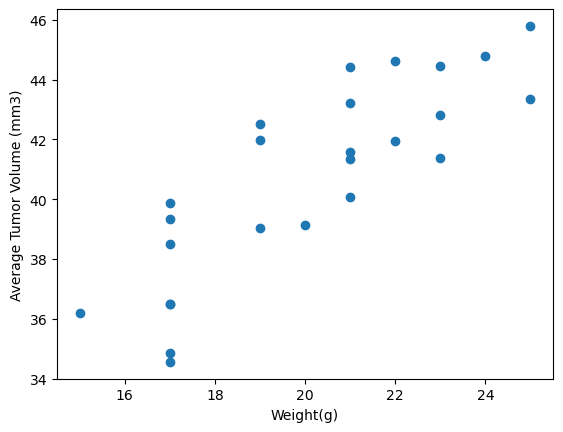

In [17]:
# Create df for Capomulin only and calculate means
capomulin = results_no_dup.loc[(results_no_dup["Drug Regimen"]=="Capomulin"), :]
vol_means = capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()

# create the x-axis value list from the means index
x_axis=[]
for m in range(len(vol_means)):
    x_axis.append(vol_means.index[m][1])  

# add labels and generate plot
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x_axis, vol_means)
plt.show()

## Correlation and Regression

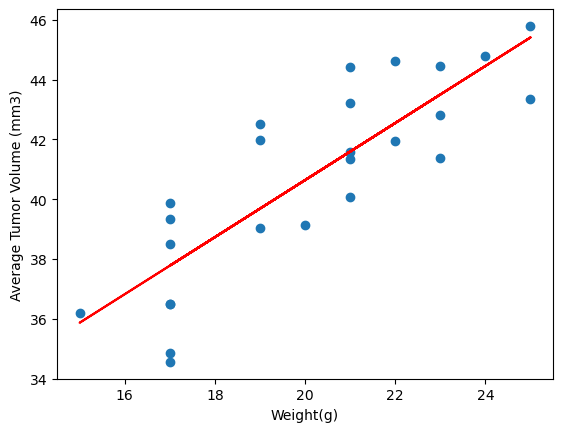

In [18]:


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, vol_means)

#regress_values = x_axis * slope + intercept

regress_values = []
for x in x_axis:
    regress_values.append(x*slope + intercept)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x_axis, vol_means)
plt.plot(x_axis, regress_values, "r-")
plt.show()

The correlation bewteen mouse weight and the average final tumor volume is 0.81 for Ramicane


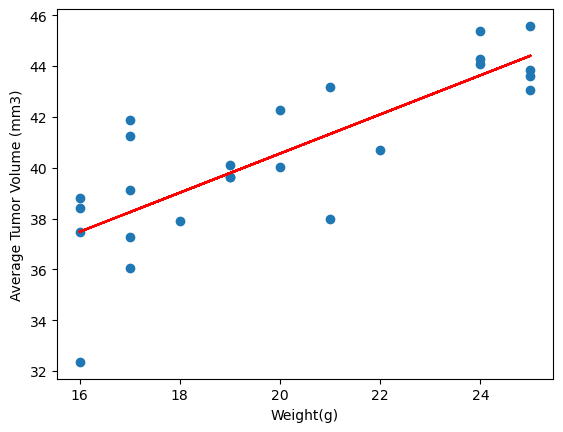

In [60]:
# Create df for Capomulin only and calculate means
ram = results_no_dup.loc[(results_no_dup["Drug Regimen"]=="Ramicane"), :]
ram_vol_means = ram.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()

# create the x-axis value list from the means index
ram_x_axis=[]
for m in range(len(ram_vol_means)):
    ram_x_axis.append(ram_vol_means.index[m][1])  

(slope, intercept, rvalue, pvalue, stderr) = linregress(ram_x_axis, ram_vol_means)

#regress_values = x_axis * slope + intercept

ram_regress_values = []
for x in ram_x_axis:
    ram_regress_values.append(x*slope + intercept)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(ram_x_axis, ram_vol_means)
plt.plot(ram_x_axis, ram_regress_values, "r-")
print(f"The correlation bewteen mouse weight and the average final tumor volume is {round(rvalue,2)} for Ramicane")
plt.show()

In [18]:
# Reduce DF to desired drug regimens using loc
cap_ram = results_no_dup.loc[(results_no_dup["Drug Regimen"]=="Capomulin") | (results_no_dup["Drug Regimen"]=="Ramicane"), :]
cap_ram.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [19]:
# Create DF for final time point only for desired regimens
cr_max_tp = cap_ram.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
cr_fin_vol = pd.merge(cr_max_tp, cap_ram, on=["Mouse ID", "Timepoint"], how="inner")
cr_fin_vol.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


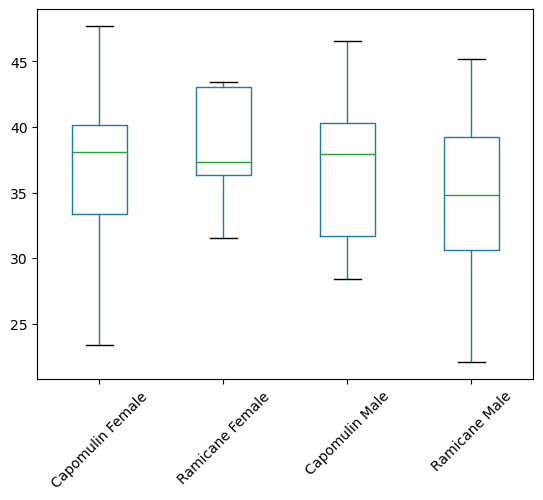

In [51]:
# See if gender shows any notable differences for final tumor volume

# Get the series for tumor volume by regimen.gender
female_cap = cr_fin_vol.loc[((cr_fin_vol["Drug Regimen"]=="Capomulin") & (cr_fin_vol["Sex"]=="Female")), "Tumor Volume (mm3)"].reset_index(drop=True)
female_ram = cr_fin_vol.loc[((cr_fin_vol["Drug Regimen"]=="Ramicane") & (cr_fin_vol["Sex"]=="Female")), "Tumor Volume (mm3)"].reset_index(drop=True)
male_cap = cr_fin_vol.loc[((cr_fin_vol["Drug Regimen"]=="Capomulin") & (cr_fin_vol["Sex"]=="Male")), "Tumor Volume (mm3)"].reset_index(drop=True)
male_ram = cr_fin_vol.loc[((cr_fin_vol["Drug Regimen"]=="Ramicane") & (cr_fin_vol["Sex"]=="Male")), "Tumor Volume (mm3)"].reset_index(drop=True)

# Create single data frame to hold each series
cr_gender = pd.DataFrame({"Capomulin Female":female_cap, "Ramicane Female":female_ram, 
                          "Capomulin Male":male_cap, "Ramicane Male":male_ram})

# Create box plot using pandas
cr_gender.boxplot(grid=False, rot=45)
plt.show()

In [55]:
# cap_ram.head()
cr_fin_vol.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


The correlation bewteen mouse weight and the average final tumor volume is 0.9 for Capomulin & Ramicane


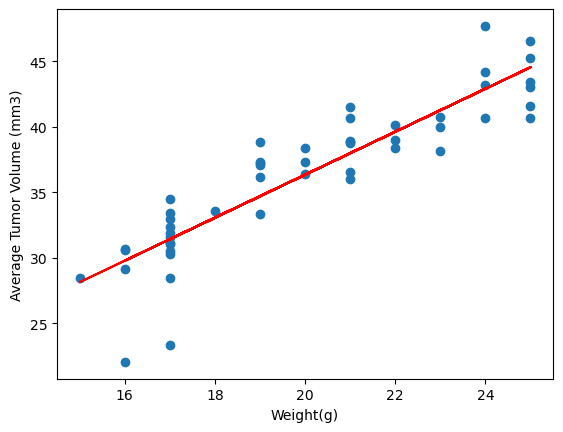

In [58]:
cr_fin_vol_means = cr_fin_vol.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
cr_fin_weight_means = cr_fin_vol.groupby("Mouse ID")["Weight (g)"].mean()

# Get the linear regression numbers
(slope, intercept, rvalue, pvalue, stderr) = linregress(cr_fin_weight_means, cr_fin_vol_means)

# Get the y-values for the regression line using linear equation y = m
cr_fin_regress_values = cr_fin_weight_means*slope + intercept

# add labels and generate plot
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(cr_fin_weight_means, cr_fin_vol_means)
plt.plot(cr_fin_weight_means, cr_fin_regress_values, "r-")
print(f"The correlation bewteen mouse weight and the average final tumor volume is {round(rvalue,2)} for Capomulin & Ramicane")
plt.show()

